Грузим модули

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import warnings

Настраиваем следу

In [2]:
warnings.filterwarnings('ignore')

%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Обрабатываем выборку

In [3]:
X, y = load_iris(return_X_y=True)
X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Рисуем график

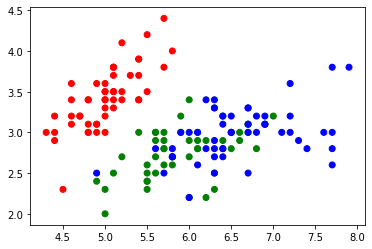

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
plt.show()

Составляем функции

In [5]:
def me_metrics(metrics, x1, x2):
    '''Манхеттенская метрика'''
    
    distance=0
    
    if metrics=='e':
        q = 2
        for i in range(len(x1)):
            distance += ((x1[i] - x2[i])**q)
        
    elif metrics=='m':
        q = 1
        for i in range(len(x1)):
            distance += (((x1[i] - x2[i])**2)**(1/2))**q
        
    return distance**(1/q)

In [6]:
def knn(x_train, y_train, x_test, metrics, k, dn):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = me_metrics(metrics, x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            if dn == 1:
                classes[d[1]] += 1*(1**d[1])
            elif dn == 2:
                classes[d[1]] += 1*(1/(d[1]+1)**2)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    '''Вычисление точности'''
    
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(x_train, y_train, metrics, k, dn):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02
    if metrics == 'e':
        m = 'Эвклидовая'
    elif metrics == 'm':
        m = 'Манхеттенская'

    # Расчет пределов графика
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(x_train, y_train, np.c_[xx.ravel(), yy.ravel()], metrics, k, dn)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k} - {m} метрика")
    plt.show()

In [9]:
def pipeline(x_train, y_train, x_test, metrics, k, dn=1):
    
    if metrics == 'e':
        m = 'Эвклидовая'
    elif metrics == 'm':
        m = 'Манхеттенская'
    y_pred = knn(x_train, y_train, x_test, metrics, k, dn)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f} - {m} метрика')
    
    get_graph(x_train, y_train, metrics, k, dn)

3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

Посмотрим результаты по __дистанции__ $w(d)=q^d, q\in(0,1)$

Точность алгоритма при k = 4: 0.833 - Эвклидовая метрика


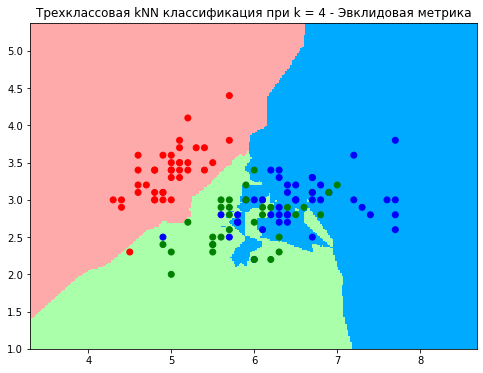

Точность алгоритма при k = 4: 0.800 - Манхеттенская метрика


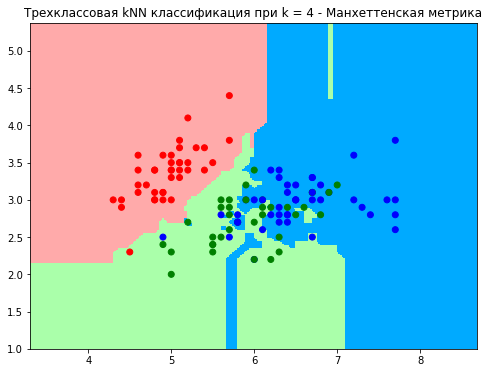

In [15]:
k = 5
dn = 1

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    dn=dn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    dn=dn
)

Ничем __не отличается__ от обычного варианта, ни по качеству ни по гиперплоскости.<br>
- Оптимальное число соседей - 5

Посмотрим результаты по __дистанции__ $w(d)=\frac{1}{d}$

Точность алгоритма при k = 10: 0.833 - Эвклидовая метрика


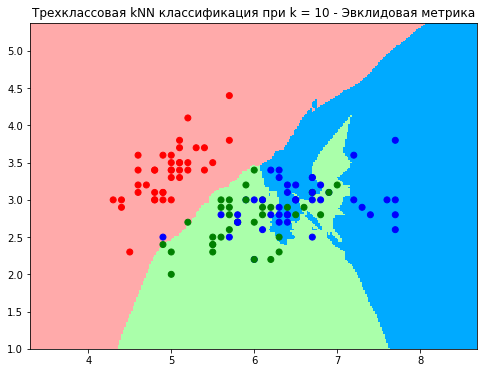

Точность алгоритма при k = 10: 0.800 - Манхеттенская метрика


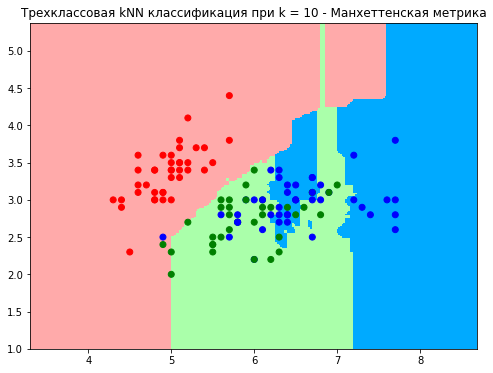

In [27]:
k = 10
dn = 2

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='e', # Эвклидова метрика
    k=k,
    dn=dn
)

pipeline(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    metrics='m', # Манхеттенская метрика
    k=k,
    dn=dn
)

- Оптимальное число соседей 10

4*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).